<a href="https://colab.research.google.com/github/ezreth/programacdp/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1

In [1]:
#importar librerías numpy, pandas y seaborn
import numpy as np
import pandas as pd
import seaborn as sns


# Ejercicio N°1

Escribir un programa que pregunte al usuario o genere las ventas
de los últimos 5 días, y muestre por pantalla una serie (Dataframe)
con los datos de las ventas por producto (opcional): Nro de
unidades y precio unitario, indexada por los días, antes y después
de aplicarles un descuento del 5%.

In [19]:
inicio = int(input('Introduzca el dia inicial: ')) #solicito el primer día de ventas
fin = int(input('Introduzca el dia final: ')) #solicito el día final de ventas
ventas = {} #creoun dicionario vacio


for i in range(inicio, fin+1):  #añado los elementos por cada dia

    ventas[i] = float(input('Ingrese las ventas del día ' + str(i) + ': '))

ventas = pd.Series(ventas) #convierto el diccionario a una serie con pandas

print('Ventas\n',ventas)

print('Ventas con descuento\n',ventas-ventas*0.05)


Introduzca el dia inicial: 1
Introduzca el dia final: 5
Ingrese las ventas del día 1: 78.5
Ingrese las ventas del día 2: 145.90
Ingrese las ventas del día 3: 45.67
Ingrese las ventas del día 4: 290.50
Ingrese las ventas del día 5: 78.99
Ventas
 1     78.50
2    145.90
3     45.67
4    290.50
5     78.99
dtype: float64
Ventas con descuento
 1     74.5750
2    138.6050
3     43.3865
4    275.9750
5     75.0405
dtype: float64


# Ejercicio No 2

Escribir un programa que reciba un diccionario con los ingresos
mensuales de los clientes de una empresa, y devuelva una serie
con el ingreso mínimo, máximo y media.
El resultado final debe ser una serie con los estadísticos.

In [20]:
'''
Funcion que recibe un diccionario y retorna sus estadisticos

Ejemplo:
diccionario de ingreso: ingresos = {'Juan':1500, 'Cynthia':450, 'Geovanny':1200, 'Diego': 1700, 'Francisco': 3200}
serie con los estadisticos: estadisticos = pd.Series([ingresos.min(), ingresos.max(), ingresos.mean()], index=['Min', 'Max', 'Media'])
'''

def estadistica_ingresos(ingresos):  #funcion que recibe un diccionario de entrada
    ingresos = pd.Series(ingresos) #convierto a una serie con pandas
    estadisticos = pd.Series([ingresos.min(), ingresos.max(), ingresos.mean()], index=['Min', 'Max', 'Media']) #calculo los estadisticos en una nueva serie
    return estadisticos #retorno la serie de estadisticos

#ejecuto la funcion
ingresos = {'Juan':1500, 'Cynthia':450, 'Geovanny':1200, 'Diego': 1700, 'Francisco': 3200}
estadistica_ingresos(ingresos)

Min       450.0
Max      3200.0
Media    1610.0
dtype: float64

# Ejercicio No 3

Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la siguiente tabla:

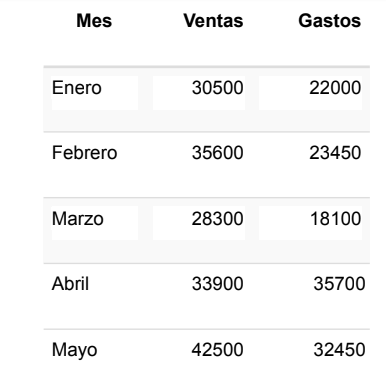

A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.




In [21]:


datos = [['Enero', 30500, 22000], ['Febrero', 35600, 23450], ['Marzo', 28300, 18100], ['Abril', 33900,35700],['Mayo',42500,32450]] #creo un arreglo con la data
contabilidad = pd.DataFrame(datos, columns=['Mes', 'Ventas', 'Gastos']) #añado el arreglo a un dtaframe y creo sus columnas
#añado las nuevas columnas del enunciado
contabilidad['Columna1'] = (contabilidad['Gastos']/contabilidad['Ventas'])*100
contabilidad['Columna2'] =  np.where(contabilidad['Ventas']>=30000,'Meta Superada','Meta no Superada')
contabilidad['Columna3'] =  np.where(contabilidad['Gastos']>contabilidad['Ventas'],contabilidad['Gastos']-contabilidad['Ventas'],0)

#imprimo el dataframe
contabilidad




,Mes,Ventas,Gastos,Columna1,Columna2,Columna3
0,Enero,30500,22000,72.131148,Meta Superada,0
1,Febrero,35600,23450,65.870787,Meta Superada,0
2,Marzo,28300,18100,63.957597,Meta no Superada,0
3,Abril,33900,35700,105.309735,Meta Superada,1800
4,Mayo,42500,32450,76.352941,Meta Superada,0


4. Obtener el total de las ventas de los últimos 3 meses


In [22]:
indice = contabilidad.index.max() -2 #calculo el valor del indice a recorrer como tengo 5 elementos resto 2 para quedarme con tres meses
suma = 0

for i in range(len(contabilidad)): #recorro el dataframe
  if i >= indice:  # si el indice es mayor o igual al calculado sumo la ventas
    suma += contabilidad.loc[i,"Ventas"]

print('La suma de los ultimos tres meses es: ' + str(suma))


La suma de los ultimos tres meses es: 104700


5. Obtener el total de gastos de febrero a abril

In [27]:
gastos = 0

for i in range(len(contabilidad)): # recorro el dataframe
  if i > 0 or i < contabilidad.index.max(): #si el indice es mayor al primer mes sumo los gastos
    gastos += contabilidad.loc[i,"Gastos"]

print('El total de gastos desde Febrero es: ' + str(gastos))

El total de gastos desde Febrero es: 131700


# Ejercicio No 4

Con el siguiente fichero datos_seguros.csv contiene información
de riesgo de clientes de un banco. Escribir un programa con los
siguientes requisitos:
1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el
número de datos que contiene, los nombres de sus columnas
y filas, los tipos de datos de las columnas, mostrar las 10
primeras filas y las 10 últimas filas, verificar si tiene datos
perdidos/nulos.
3. Extraer las 1000 primeras filas y almacenarlas en un
contenedor.

In [24]:
#Generar un DataFrame con los datos del fichero

seguros = pd.read_csv('datos_seguros.csv',sep=';')

# Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas.
print('Dimensiones:\n',seguros.shape)
print('Número de elementos:\n', seguros.size)
print('Nombres de columnas:\n', seguros.columns)
print('Nombres de filas:\n', seguros.index.values)  #df.index.values
print('Tipos de datos:\n', seguros.dtypes)
print('Primeras 10 filas:\n', seguros.head(10))
print('Últimas 10 filas:\n', seguros.tail(10))

Dimensiones:
 (45798, 17)
Número de elementos:
 778566
Nombres de columnas:
 Index(['MES_T0', 'VENTA_SEGURO', 'NUM_TC_TOTAL_T2', 'SALDO_BCO_T2',
       'LINEA_BCO_T2', 'USO_LINEA_BCO_T2', 'Nro_CTa_Ahorro_Bco_T1',
       'Ahorro_Sldo_Bco_T1', 'monto_ope_t2', 'PROM_ANUAL_MTO_OPERA',
       'MAX_MTO_OPERA_Anual', 'Ratio_HospvsMtoTotal_t2', 'SEXO',
       'ANTIGUEDAD_MES', 'DEPARTAMENTO', 'SOW_BCO_T2', 'SOW_BCO_SEMESTRAL'],
      dtype='object')
Nombres de filas:
 [    0     1     2 ... 45795 45796 45797]
Tipos de datos:
 MES_T0                       int64
VENTA_SEGURO                 int64
NUM_TC_TOTAL_T2            float64
SALDO_BCO_T2               float64
LINEA_BCO_T2               float64
USO_LINEA_BCO_T2           float64
Nro_CTa_Ahorro_Bco_T1      float64
Ahorro_Sldo_Bco_T1         float64
monto_ope_t2               float64
PROM_ANUAL_MTO_OPERA       float64
MAX_MTO_OPERA_Anual        float64
Ratio_HospvsMtoTotal_t2    float64
SEXO                        object
ANTIGUEDAD_MES       

Existen los siguientes datos perdidos en total:

NUM_TC_TOTAL_T2: 20401
SALDO_BCO_T2: 20346
LINEA_BCO_T2: 20346
USO_LINEA_BCO_T2: 20346
Nro_CTa_Ahorro_Bco_T1: 1393
Ahorro_Sldo_Bco_T1: 1393
monto_ope_t2: 12871
PROM_ANUAL_MTO_OPERA: 12871
MAX_MTO_OPERA_Anual: 12871
Ratio_HospvsMtoTotal_t2: 16079


<Axes: >

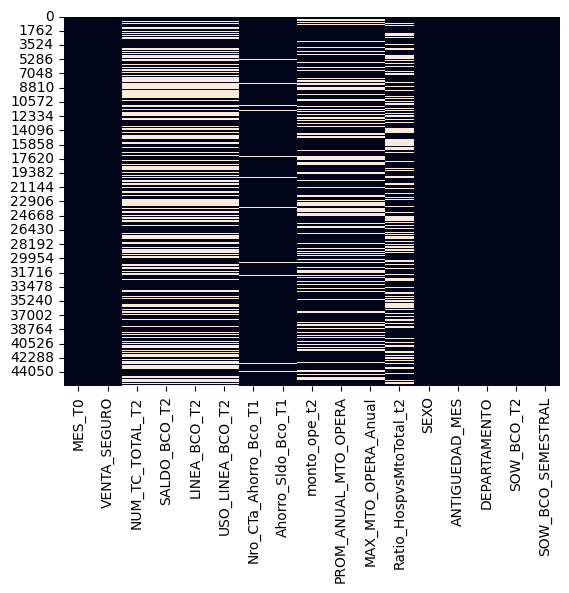

In [25]:
#verificar si tiene datos perdidos/nulos

nulos = seguros.isnull().sum()

print('Existen los siguientes datos perdidos en total:\n')

for i in range(len(nulos)):
    if nulos[i] > 0:
      print(nulos.index.values[i] + ': ' + str(nulos[i]))

sns.heatmap(seguros.isnull(), cbar=False)



In [26]:
#Extraer las 1000 primeras filas y almacenarlas en un contenedor.
muestra = seguros.head(1000)
muestra



,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.000000,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,201506,0,1.0,4357.0,4600.0,0.947173,0.0,0.0,187.58,758.380833,1326.14,NaN,M,25,LIMA,0.194025,0.180906
996,201506,0,NaN,NaN,NaN,NaN,1.0,545.0,104.00,104.000000,104.00,1.000000,F,55,CUSCO,0.000000,0.000000
997,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,414.64,243.107500,550.00,NaN,F,24,LIMA,1.000000,1.000000
998,201506,0,1.0,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,M,50,AREQUIPA,0.000000,0.000000
